In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy._lib.six import xrange
import sys
from PIL import Image, ImageFilter
import math
from collections import Counter

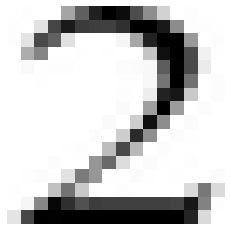

Ini Matriks Citra Asli RGB
[[[255 255 255]
  [253 253 253]
  [255 255 255]
  [255 255 255]
  [165 165 165]
  [ 95  95  95]
  [ 32  32  32]
  [  0   0   0]
  [ 12  12  12]
  [ 77  77  77]
  [141 141 141]
  [210 210 210]
  [255 255 255]
  [253 253 253]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [255 255 255]
  [226 226 226]
  [ 69  69  69]
  [ 26  26  26]
  [ 59  59  59]
  [ 62  62  62]
  [ 64  64  64]
  [ 48  48  48]
  [  0   0   0]
  [  0   0   0]
  [ 25  25  25]
  [140 140 140]
  [253 253 253]
  [253 253 253]
  [254 254 254]]

 [[253 253 253]
  [228 228 228]
  [ 73  73  73]
  [ 97  97  97]
  [225 225 225]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [246 246 246]
  [166 166 166]
  [ 34  34  34]
  [  0   0   0]
  [  1   1   1]
  [153 153 153]
  [255 255 255]
  [252 252 252]]

 [[255 255 255]
  [173 173 173]
  [133 133 133]
  [255 255 255]
  [255 255 255]
  [254 254 254]
  [255 255 255]
  [254 254 254]
  [255 255 255]
  [255 255 255]
  [196 196 196]
  [ 16  16  16]
  [  0 

In [2]:
#Masukkan citra asli
image = cv2.imread("2.png")
plt.imshow(image)
plt.axis("off")
plt.show()

print("Ini Matriks Citra Asli RGB")
print(image)

(16, 16, 3)
(16, 16)


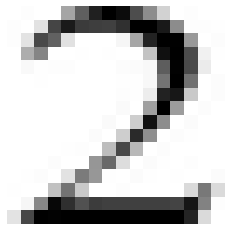

Ini Matriks Citra Grayscale
[[255. 253. 255. 255. 165.  95.  32.   0.  12.  77. 141. 210. 255. 253.
  255. 255.]
 [253. 255. 226.  69.  26.  59.  62.  64.  48.   0.   0.  25. 140. 253.
  253. 254.]
 [253. 228.  73.  97. 225. 255. 255. 255. 246. 166.  34.   0.   1. 153.
  255. 252.]
 [255. 173. 133. 255. 255. 254. 255. 254. 255. 255. 196.  16.   0.  75.
  241. 254.]
 [255. 249. 254. 253. 253. 255. 255. 255. 252. 251. 248.  93.   2.  73.
  235. 255.]
 [255. 255. 254. 255. 255. 255. 255. 255. 254. 254. 248. 116.   0. 113.
  255. 252.]
 [255. 255. 255. 255. 255. 255. 255. 255. 253. 254. 237.  34.  23. 201.
  255. 252.]
 [255. 255. 255. 255. 255. 255. 255. 255. 250. 255. 160.   0. 156. 255.
  252. 255.]
 [255. 255. 255. 255. 255. 255. 255. 250. 255. 206.  17. 141. 255. 251.
  255. 255.]
 [255. 255. 255. 255. 255. 255. 251. 255. 206.  42. 143. 255. 252. 254.
  255. 255.]
 [255. 255. 255. 255. 254. 253. 255. 189.  72. 184. 255. 252. 255. 255.
  255. 255.]
 [255. 255. 255. 252. 255. 255. 150. 

True

In [6]:
#grayscale image
# the shape of the image
print (image.shape)

# Intialize a new array of zeroes with the same shape
grayscale_image = np.zeros((image.shape[0],image.shape[1]));

# 'Human' Average - adapted for human eyes
def average1(pixel):
    return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]

# Raw Average 
def average2(pixel):
    return np.average(pixel);

# Map averages of pixels to the grey image
for r in range(len(image)): 
    for c in range(len(image[r])): 
        # Use human average
        grayscale_image[r][c] = average1(image[r][c]);
        
#hanya tampil gambar
plt.imshow(grayscale_image, cmap= 'gray') 
plt.axis("off")
#plt.savefig("hasil_grayscale.png")
plt.show()
print("Ini Matriks Citra Grayscale")
#tampilkan matriks gambar
print(grayscale_image)
#saveimage
cv2.imwrite('grayscale.png', grayscale_image)

In [17]:
#ubah ke citra biner
def binerisasi():
    threshold=128
    row, col = grayscale_image.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if grayscale_image[i,j] >= threshold:
                y[i,j] = 0
            else:
                y[i,j] = 1
    return y
binary_image = binerisasi()

# plt.axis("off")
# plt.imshow(binary_image, cmap= 'gray')
#plt.imsave("citrabiner.png", binary_image)
# plt.show()
print("Ini Matriks Citra Biner")
#tampilkan matriks
print(binary_image)
#tampil nilai histogram
# plt.hist(binary_image.ravel(),256,[0,256]);
#saveimage
# gray_image = cv2.cvtColor(binary_image, cv2.COLOR_BGR2GRAY)
plt.imsave('binerisasi.png', np.array(binary_image), cmap='gray')
# cv2.imwrite('binerisasi.png', binary_image)

Ini Matriks Citra Biner
[[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]]


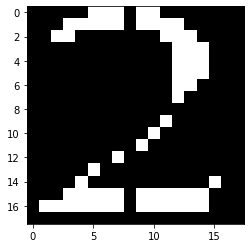

[[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [18]:
def resize(binary_image):
    pa = binary_image.shape[0]
    la = binary_image.shape[1]
    
    resize_img = np.zeros(shape=[18, 18])
    for i in range(0, pa):
        for j in range(0, la):
            if (binary_image[i, j] == 1):
                x = math.floor((18 * i) / pa)
                y = math.floor((18 * j) / la)
                resize_img[x, y] = binary_image[i, j]
    return resize_img
resize_image = resize(binary_image)
#hanya tampil gambar
plt.imshow(resize_image, cmap='gray')
#plt.savefig("resize.png")
plt.show()
#tampilkan matriks
print(resize_image)
#tampilkan ukuran citra
print(resize_image.shape)
#saveimage
# cv2.imwrite('resize.png', resize_image)
plt.imsave('resize.png', np.array(resize_image), cmap='gray')

In [19]:
#Tampilkan Vektor
a = np.array(resize_image)
a.flatten()
vektor=a.flatten()
print(vektor)

[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
#Simpan Vektor ke .txt
file = open("vektor B.txt","w")
file.write(json.dumps(vektor.tolist()))
file.close()

NameError: name 'json' is not defined